In [1]:
import numpy as np
import matplotlib.pyplot as plt

**ANN Network** 
                
             Forward propagation: 
             input--2 hidden--10 , output--1

| Input  |  ->   | LINEAR |  ->   | RELU |  ->   | LINEAR |  ->   | SIGMOID|
|------  |------ |------  |------ |------|------ |------  |------ |------  |
| 2      |  ->   | 10     |  ->   | 10   |  ->   | 1      |  ->   | 1      |


*Input dimention* : format matrix, Row  are Number of  features and Columns is total number of input 

*cost function*:: Cross-entropy cost
* Network can be apply for any binary  classification  problem 

* Only two layer are available 

**parameters**

    dict_keys(['W1', 'b1', 'W2', 'b2']), [20, 10, 10, 1]
    Total =41 (Trainble parameters)
####  After  40000 Iteration Error Is Approx Zero (0.0119) 


**Output**

     [0.00785878 0.9924926  0.99010905 0.01446849]

#### After Only 500 Iteration network can classify correctly  100% accuracy

**Output**

     [0.49999978 0.50000008 0.50000014 0.49999993]




In [33]:
x_train=np.array([[0.9,0.9],[0.9,0.1],[0.1,0.9],[0.1,0.1],]).T
y_train=np.array([0,1,1,0]).reshape(1,-1)
layers_dims = (2,10, 1) # input 2 units hideen  10 units one output unit.
print("input type {}".format(type(x_train)))
print("y_train size : {}".format(y_train.shape))
print("x_train size : {}".format(x_train.shape))

input type <class 'numpy.ndarray'>
y_train size : (1, 4)
x_train size : (2, 4)


## Activation Function

In [20]:

def sigmoid(Z):
    
    return 1/(1+np.exp(-Z)), Z

def relu(Z):
    return np.maximum(0,Z), Z

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) 
    # When z <= 0, you should set dz to 0 as well. 
    dZ[cache <= 0] = 0
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ


## Parameter Intialize

In [21]:
def initialize_parameters_n_layes(layer_dims):
    parameters = {}
    N = len(layer_dims)            # number of layers in the network
    
    
    # intialized parameters layer by layer
    for n in range(1, N):
        parameters['W' + str(n)] = np.random.randn(layer_dims[n], layer_dims[n-1]) * 0.001
        parameters['b' + str(n)] = np.zeros((layer_dims[n], 1))*0.001
        
    return parameters

# Forward propagation
    """
    Implement the linear part of a layer's forward propagation.
    A -- After activations function apply 
    W -- weights matrix:
    b -- bias 
    """

In [22]:
def linear_forward(A, W, b):
    Z = np.dot(W,A)+ b 
    cache = (A, W, b)
    return Z, cache

In [23]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)

    return A, cache

In [24]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 5000):
    grads = {}
    costs = []                              # to keep track of the cost 
    m = X.shape[1]                           # number of examples
    
    # Initialize parameters dictionary
    parameters = initialize_parameters_n_layes(layers_dims)
    

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID.
        A1, cache1 = linear_activation_forward(X, parameters["W1"], parameters["b1"], "relu")
        A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], "sigmoid")
       
        # Compute cost 
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        
        # Backward propagation. 
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'],grads['db1'],grads['dW2'],grads['db2']  = dW1, db1, dW2, db2
        
        # Update parameters W1, b1, W2, b2
        parameters = update_parameters(parameters, grads, learning_rate)

    
        # Print the cost 
        step=2000 # store after step iterations
        if i % step == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % step == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations ({})'.format(step))
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    # return updated paramenters
    return parameters

## Cost function

    Arguments:
    AL -- probability 
    Y -- true "label" 
    cost -- cross-entropy cost
"""

In [25]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -1/m * np.sum(np.multiply(np.log(AL), Y) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)
    
    return cost

## backward propagation

In [26]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW =  1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ,axis = 1,keepdims = True )
    dA_prev = np.dot(W.T,dZ)
    """
    Arguments:
    dZ -- Gradient with respect to ;
    cache -- tuple of values (A_prev, W, b) from forward propagation
    Returns:
    dA_prev -- Gradient of the cost with prev layer
    dW -- db  Gradient
    """
    return dA_prev, dW, db

In [27]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    #Gradient with respect to prev and Gradient
    return dA_prev, dW, db

In [28]:
def update_parameters(parameters, grads, learning_rate):
    
    N = len(parameters) // 2 # number of layers in the neural network

    # Update prameters W1,W2,b1,b2
    for n in range(N):
        parameters["W" + str(n+1)] = parameters["W" + str(n+1)] - learning_rate * grads["dW" + str(n+1)]
        parameters["b" + str(n+1)] = parameters["b" + str(n+1)] - learning_rate * grads["db" + str(n+1)]
    return parameters

Cost after iteration 0: 0.6931472586503031
Cost after iteration 2000: 0.08488040170255441
Cost after iteration 4000: 0.043621619253829416
Cost after iteration 6000: 0.028393621517264545
Cost after iteration 8000: 0.020795304140719912
Cost after iteration 10000: 0.01631664160580837
Cost after iteration 12000: 0.013398757810594113
Cost after iteration 14000: 0.0113277506818646
Cost after iteration 16000: 0.009804402003373798
Cost after iteration 18000: 0.00863793300464562
Cost after iteration 20000: 0.007716851584346558
Cost after iteration 22000: 0.006971630803673124
Cost after iteration 24000: 0.0063566453700167865
Cost after iteration 26000: 0.0058369756719609004
Cost after iteration 28000: 0.005395697278953169
Cost after iteration 30000: 0.005015713871905336
Cost after iteration 32000: 0.004685747739290655
Cost after iteration 34000: 0.004394208190113125
Cost after iteration 36000: 0.004138257066356378
Cost after iteration 38000: 0.003910576233381333


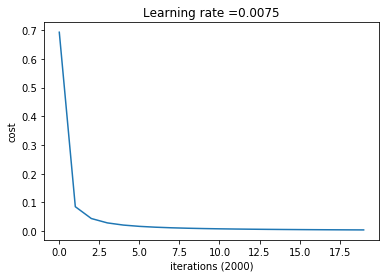

In [29]:
parameters = two_layer_model(x_train,y_train,
                             layers_dims = layers_dims,
                             num_iterations = 40000)

In [30]:
def predict(X, y, parameters,layers_dims):
    m = X.shape[1] # number of inputes
    predictions = np.zeros((1,m)) # class
    
    # Forward propagation
    A1, cache1 = linear_activation_forward(X, parameters['W1'], parameters['b1'], "relu")
    A2, cache2 = linear_activation_forward(A1, parameters['W2'], parameters['b2'], "sigmoid")
    print(A2)
    
    for i in range(A2.shape[1]):
        if A2[:,i]>0.5:
            predictions[:,i]=1
        else:
            predictions[:,i]=0
    
    print("Accuracy: "  + str(np.sum((predictions == y)/m)))
        
    return predictions



In [31]:
predict(x_train, y_train,parameters,layers_dims)

[[2.58033964e-45 9.85648125e-01 9.99979495e-01 3.43721225e-04]]
Accuracy: 1.0


array([[0., 1., 1., 0.]])

In [32]:
parameters.keys(), [parameters[x].shape[0]*parameters[x].shape[1] for x in parameters.keys()]

(dict_keys(['W1', 'b1', 'W2', 'b2']), [20, 10, 10, 1])